<a href="https://colab.research.google.com/github/zsenof/Systeme_recommandation_films_creuse/blob/main/4_Model_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Machine Learning**

**Récupérer la dataframe df_clean**

In [ ]:
import pandas as pd

df = pd.read_csv("df_clean.csv")

In [ ]:
df.head()

,tconst,original_title,startYear,runtimeMinutes,genres,averageRating,poster_path,acteurs/trice,director,overview_fr
0,tt0052614,Le Bel Âge,1960,100,"Comedy,Drama",7.0,/98Z5yPoNIm8sQeyep5cpr5NHov9.jpg,"['Marcello Pagliero', 'Boris Vian', 'Jacques D...",['Pierre Kast'],"Steph, Jean-Claude et Jacques travaillent dans..."
1,tt0053279,Le Signe du Lion,1962,103,Drama,7.2,/b5jY3jyISYMY0ReGjqtbgaPq7dr.jpg,"['Jess Hahn', 'Van Doude', 'Paul Bisciglia', '...",['Éric Rohmer'],Un Américain à Paris vit en sillonnant ses ami...
2,tt0055910,Cybèle ou les dimanches de ville d'Avray,1962,111,Drama,7.8,/9L5DtYYlO3yrg2qtTCxROLnLl2V.jpg,"['Hardy Krüger', 'Daniel Ivernel', 'André Ouma...",['Serge Bourguignon'],L'histoire tragique d'une jeune orpheline qui ...
3,tt0056636,Un singe en hiver,1962,105,"Comedy,Drama",7.4,/g0NxvdRRmuelSxc0NsmsgfZJrgi.jpg,"['Jean Gabin', 'Jean-Paul Belmondo', 'Charles ...",['Henri Verneuil'],"L'histoire d'un homme qui a cessé de boire, pu..."
4,tt0056581,Thérèse Desqueyroux,1962,109,Drama,7.1,/xqpxhzrJzKwJTcEcm7XIL70QrPD.jpg,"['Philippe Noiret', 'Sami Frey', 'Richard Sain...",['Georges Franju'],"Thérèse vit dans une ville provinciale, malheu..."


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
startYear,76.0,1977.855263,19.123949,1960.0,1967.0,1972.00,1976.25,2023.0
runtimeMinutes,76.0,101.592105,9.128969,90.0,93.0,100.00,109.00,120.0
averageRating,76.0,7.294737,0.267280,7.0,7.1,7.25,7.40,8.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          76 non-null     object 
 1   original_title  76 non-null     object 
 2   startYear       76 non-null     int64  
 3   runtimeMinutes  76 non-null     int64  
 4   genres          76 non-null     object 
 5   averageRating   76 non-null     float64
 6   poster_path     76 non-null     object 
 7   acteurs/trice   76 non-null     object 
 8   director        76 non-null     object 
 9   overview_fr     76 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 6.1+ KB


In [ ]:
# création d'une nouvelle colonne genre_numeric

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['genre_numeric'] = label_encoder.fit_transform(df['genres'])

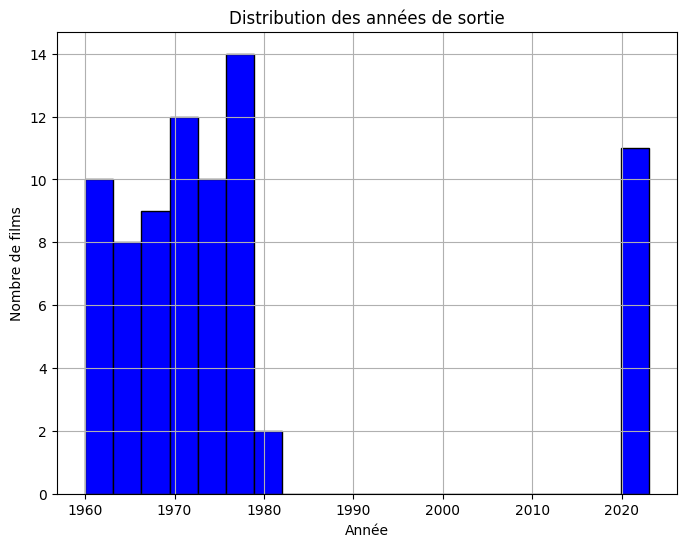

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(df['startYear'], bins=20, color='blue', edgecolor='black')
plt.grid()
plt.title('Distribution des années de sortie')
plt.xlabel('Année')
plt.ylabel('Nombre de films')
plt.show()

<Figure size 800x600 with 0 Axes>

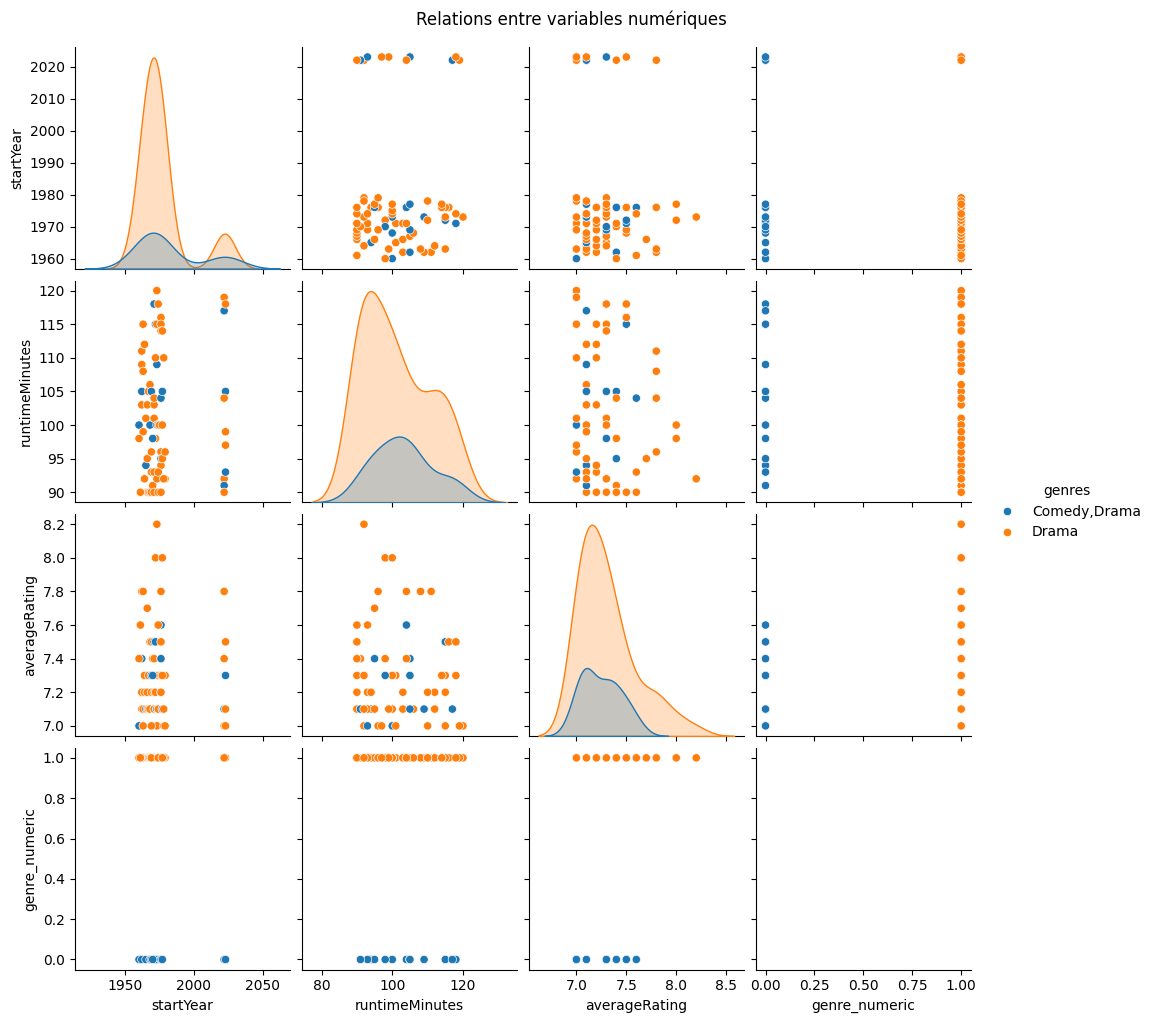

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.pairplot(df,  diag_kind='kde', hue = 'genres')
plt.suptitle('Relations entre variables numériques', y=1.02)
plt.show()

In [ ]:
df['genres'].value_counts()

,count
genres,
Drama,59
"Comedy,Drama",17


In [ ]:
df_corr = df.corr(numeric_only = True)

<Axes: >

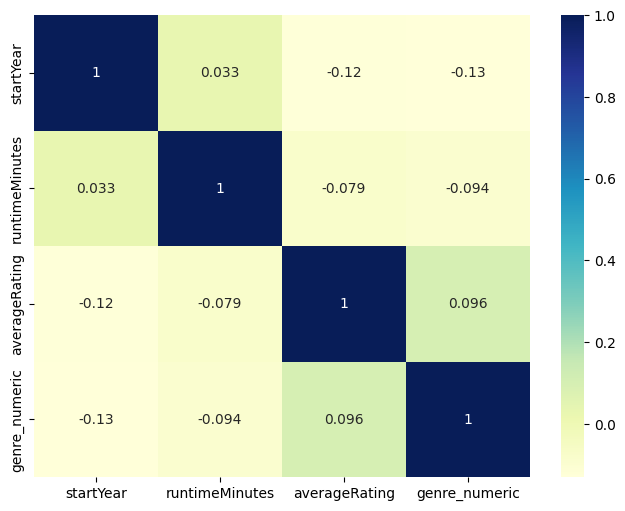

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap="YlGnBu", cbar=True)


<Axes: ylabel='averageRating'>

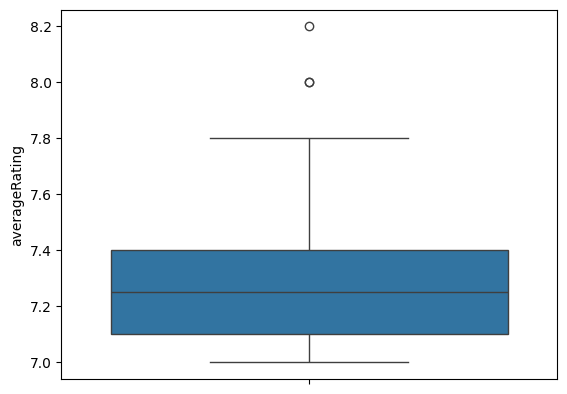

In [ ]:
sns.boxplot(df.averageRating)

<Axes: xlabel='genres', ylabel='Count'>

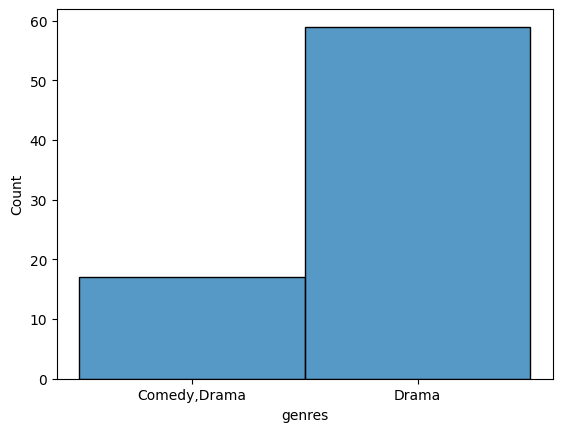

In [ ]:
sns.histplot(df.genres)

In [ ]:
# colonnes pertinentes : startYear,	runtimeMinutes,	genres,	averageRating


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

features = ['startYear', 'runtimeMinutes', 'averageRating', 'genre_numeric']

# normalisation des données

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(df[features])

# transformation en dataframe
df_scal = pd.DataFrame(X_scaled, columns= ['startYear', 'runtimeMinutes', 'averageRating', 'genre_numeric'], index = df['original_title'])

# Initiation du modèle NearestNeighbors

knn = NearestNeighbors(n_neighbors=4, metric='cosine')
knn.fit(df_scal)

metric = 'cosine'

le_bel_age_index = df[df['original_title'] == 'Le Bel Âge'].index[0]
distances, indices = knn.kneighbors(X_scaled[le_bel_age_index].reshape(1, -1))

# Affichage des résultats
print(f"\nFilms similaires à 'Le Bel Âge':")
for distance, index in zip(distances[0][1:], indices[0][1:]):  # Exclut 'Le Bel Âge' (index 0)
    print(f"{df['original_title'].iloc[index]}")


Films similaires à 'Le Bel Âge':
Le Retour d’Afrique
Le souffle au cœur
La vraie nature de Bernadette


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [ ]:
df_scal.head()

,startYear,runtimeMinutes,averageRating,genre_numeric
original_title,,,,
Le Bel Âge,0.000000,0.333333,0.000000,0.0
Le Signe du Lion,0.031746,0.433333,0.166667,1.0
Cybèle ou les dimanches de ville d'Avray,0.031746,0.700000,0.666667,1.0
Un singe en hiver,0.031746,0.500000,0.333333,0.0
Thérèse Desqueyroux,0.031746,0.633333,0.083333,1.0


In [ ]:
# Initiation du modèle NearestNeighbors

knn = NearestNeighbors(n_neighbors=4, metric='cosine')
knn.fit(df_scal)

NearestNeighbors(metric='cosine', n_neighbors=4)

In [ ]:
# exemple film 'Le Bel Âge'

le_bel_age_index = df[df['original_title'] == 'Le Bel Âge'].index[0]
distances, indices = knn.kneighbors(X_scaled[le_bel_age_index].reshape(1, -1))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [ ]:
# comparaison des metric avec comme exemple le films "Le Bel Age"

for metric in ['euclidean', 'manhattan', 'chebyshev', 'cosine']:
    nn = NearestNeighbors(n_neighbors=4, metric=metric)
    nn.fit(X_scaled)
    distances, indices = nn.kneighbors(X_scaled[le_bel_age_index].reshape(1, -1))

    print(f"\n Films similaires a Le Bel Age :(metric={metric}):")
    for distance, index in zip(distances[0][1:], indices[0][1:]):
        print(f"{df['original_title'].iloc[index]} (Distance: {distance:.2f})")


 Films similaires a Le Bel Age :(metric=euclidean):
L'invitation (Distance: 0.22)
La Vieille Dame indigne (Distance: 0.23)
Alexandre le bienheureux (Distance: 0.28)

 Films similaires a Le Bel Age :(metric=manhattan):
L'invitation (Distance: 0.29)
La Vieille Dame indigne (Distance: 0.36)
Alexandre le bienheureux (Distance: 0.38)

 Films similaires a Le Bel Age :(metric=chebyshev):
La Vieille Dame indigne (Distance: 0.20)
L'invitation (Distance: 0.21)
Le Clair de terre (Distance: 0.25)

 Films similaires a Le Bel Age :(metric=cosine):
Le Retour d’Afrique (Distance: 0.06)
Le souffle au cœur (Distance: 0.10)
La vraie nature de Bernadette (Distance: 0.12)


In [ ]:
# on voit ici que la metric cosine est la plus approprié car les distances entre les films similaires sont plus proches

In [ ]:
# vérification si films simillaires

df[df['original_title'] == "Le Bel Âge" ]

,tconst,original_title,startYear,runtimeMinutes,genres,averageRating,poster_path,acteurs/trice,director,overview_fr,genre_numeric
0,tt0052614,Le Bel Âge,1960,100,"Comedy,Drama",7.0,/98Z5yPoNIm8sQeyep5cpr5NHov9.jpg,"['Marcello Pagliero', 'Boris Vian', 'Jacques D...",['Pierre Kast'],"Steph, Jean-Claude et Jacques travaillent dans...",0


In [ ]:
df[df['original_title'] == "Le souffle au cœur" ]

,tconst,original_title,startYear,runtimeMinutes,genres,averageRating,poster_path,acteurs/trice,director,overview_fr,genre_numeric
29,tt0067778,Le souffle au cœur,1971,118,"Comedy,Drama",7.5,/60aZrZWZqhjSSHxiUVYSUQEm6SD.jpg,"['Benoît Ferreux', 'Daniel Gélin', 'Michael Lo...",['Louis Malle'],Ce récit de l'arrivée de l'âge fait suite à la...,0


## Boucle qui permet de trouver les films similaires pour tout les films :

In [ ]:
# Initialisation du modèle NearestNeighbors
knn = NearestNeighbors(n_neighbors=4, metric='cosine')
knn.fit(df_scal)

# Liste pour stocker les résultats
all_similar_movies = []

# Boucle pour chaque film du dataset
for i, title in enumerate(df['original_title']):

    distances, indices = knn.kneighbors(df_scal.iloc[i].values.reshape(1, -1))


    similar_movies = [
        (df['original_title'].iloc[idx], dist)
        for idx, dist in zip(indices[0][1:], distances[0][1:])
    ]


    all_similar_movies.append({
        "film": title,
        "similar_movies": similar_movies
    })

# Afficher les résultats
for result in all_similar_movies:
    print(f"Films similaires à '{result['film']}' :")
    for similar, distance in result["similar_movies"]:
        print(f"  - {similar} (Distance: {distance:.2f})")
    print()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

Films similaires à 'Le Bel Âge' :
  - L'invitation (Distance: 0.05)
  - La Vieille Dame indigne (Distance: 0.06)
  - La Vie devant soi (Distance: 0.12)

Films similaires à 'Le Signe du Lion' :
  - Mademoiselle (Distance: 0.08)
  - L'heure de la vérité (Distance: 0.10)
  - Les Risques du métier (Distance: 0.11)

Films similaires à 'Cybèle ou les dimanches de ville d'Avray' :
  - Le Feu follet (Distance: 0.01)
  - Mon oncle Antoine (Distance: 0.15)
  - J.A. Martin photographe (Distance: 0.20)

Films similaires à 'Un singe en hiver' :
  - La Voie lactée (Distance: 0.03)
  - Alexandre le bienheureux (Distance: 0.06)
  - Le Clair de terre (Distance: 0.11)

Films similaires à 'Thérèse Desqueyroux' :
  - Françoise ou La Vie conjugale (Distance: 0.02)
  - La Prisonnière (Distance: 0.03)
  - Muriel, ou le Temps d'un retour (Distance: 0.04)

Films similaires à 'Le Feu follet' :
  - Cybèle ou les dimanches de ville d'Avray (Distance: 0.01)
  - J.A. Martin photographe (Distance: 0.14)
  - Le temps